# IMDB dataset importing

In [1]:
# Libraries importing
from keras.datasets import imdb
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 4000)
# num_words = dictionnary len

In [3]:
for i in range(5) :
    print(len(x_train[i]))

218
189
141
550
147


In [ ]:
# 0 = pad token
# 1 = beginning character of the review
# 2 = words that aren't in the dictionnary : "oov_char" parameter

# Review 123 decoding

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, '') for i in x_train[123]])
decoded_review

' beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to  on and rate it so other would enjoy too'

# Dataset processing

In [5]:
# Definition of the review structure in 200 characters
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 200)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = 200)

In [6]:
x_train.shape, x_test.shape

((25000, 200), (25000, 200))

In [7]:
x_train[0][0]

5

In [8]:
# Defining validation and test data
x_data_val, y_data_val = x_test[:int(len(x_test)/2)], y_test[:int(len(x_test)/2)]
x_data_test, y_data_test = x_test[int(len(x_test)/2):], y_test[int(len(x_test)/2):]

In [9]:
x_data_val.shape, x_data_test.shape

((12500, 200), (12500, 200))

# Definition of the model

In [11]:
# Libraries importing
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, LSTM
from keras.models import Model
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

In [16]:
input_layer = Input(shape = [200,], dtype = 'int64')

embedding_layer = Embedding(input_dim = 4000, input_length = 200, output_dim = 64)(input_layer)

LSTM_layer = LSTM(5)(embedding_layer)

dropout_layer = Dropout(0.5)(LSTM_layer)

output_layer = Dense(1, activation = "sigmoid")(dropout_layer)

model = Model(inputs = input_layer, outputs = output_layer)

model.compile(optimizer = Adam(), loss = BinaryCrossentropy(), metrics = [BinaryAccuracy()])

# Model fitting
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_data_val, y_data_val))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - binary_accuracy: 0.6737 - loss: 0.5974 - val_binary_accuracy: 0.8334 - val_loss: 0.3960
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - binary_accuracy: 0.8420 - loss: 0.3979 - val_binary_accuracy: 0.8465 - val_loss: 0.3648
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - binary_accuracy: 0.8771 - loss: 0.3286 - val_binary_accuracy: 0.8642 - val_loss: 0.3265
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - binary_accuracy: 0.8942 - loss: 0.2814 - val_binary_accuracy: 0.8630 - val_loss: 0.3278
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - binary_accuracy: 0.9060 - loss: 0.2537 - val_binary_accuracy: 0.8668 - val_loss: 0.3343


In [128]:
plot_model(model, to_file = "IMDB_model.png", show_shapes = True);

# Displaying the training results

In [108]:
# Libraries importing
import pandas as pd

In [129]:
df_curve = pd.DataFrame(history.history)
df_curve_loss = df_curve[["loss", "val_loss"]]
df_curve_acc = df_curve[["binary_accuracy", "val_binary_accuracy"]]

<Axes: >

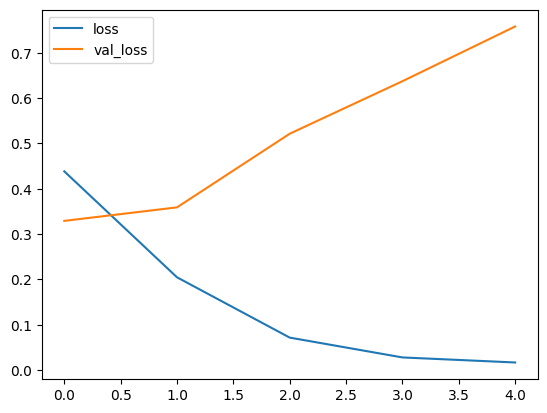

In [130]:
df_curve_loss.plot()

<Axes: >

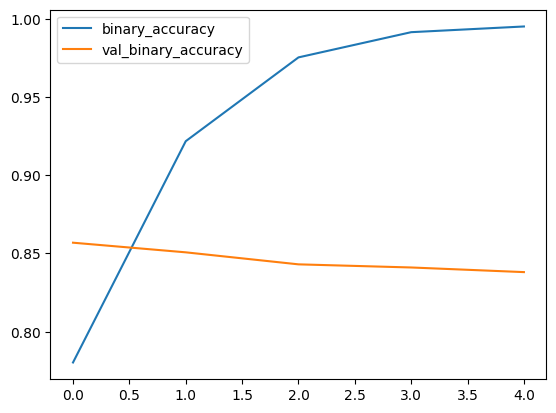

In [131]:
df_curve_acc.plot()

# Testing the model with test data

In [133]:
model.evaluate(x_data_test, y_data_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - binary_accuracy: 0.8436 - loss: 0.7249


[0.7131548523902893, 0.8456000089645386]

# Prediction with test data

In [135]:
import numpy as np

In [158]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def review_decoder(encoded_reviews) :
    decoded_reviews = encoded_reviews.copy()
    for review_index in range (len(decoded_reviews)) :
        decoded_reviews[review_index] = " ".join([reverse_word_index.get(i - 3, '') for i in decoded_reviews[review_index]])
    return decoded_reviews

In [159]:
x_test_decoded = review_decoder(x_test)

ValueError: invalid literal for int() with base 10: "                                                                                                                                     please give this one a miss br br   and the rest of the cast  terr